# Predict A Doctor's Consultation Fee 

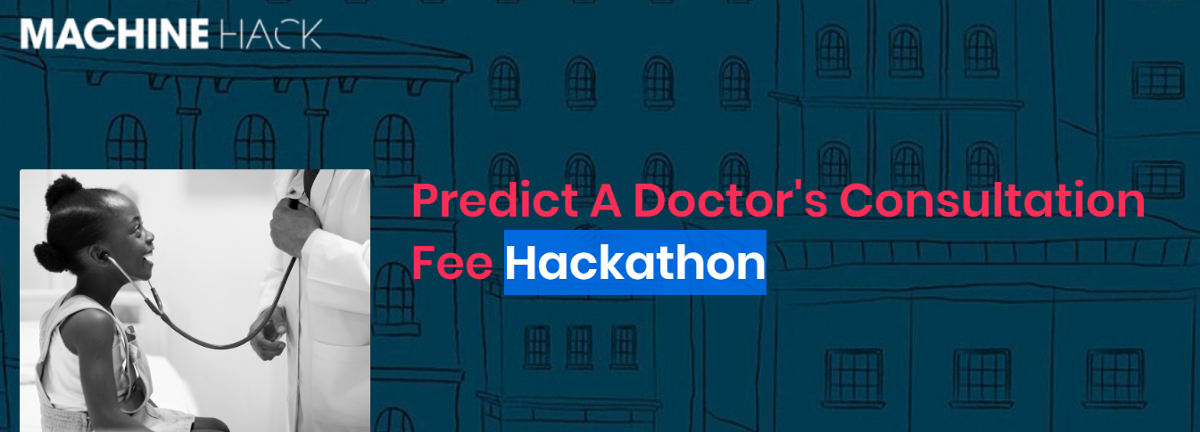

# Introduction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of ***training set:*** 5961 records

Size of ***test set:*** 1987 records

# FEATURES:

Qualification: Qualification and degrees held by the doctor

***Experience:*** Experience of the doctor in number of years

***Rating:*** Rating given by patients

***Profile:*** Type of the doctor

***Miscellaeous_Info:*** Extra information about the doctor

***Fees:*** Fees charged by the doctor

***Place:*** Area and the city where the doctor is located.

# Load scikit-learn libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import unicodedata
import re
from collections import Counter

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
train_df = pd.read_excel('Final_Train.Xlsx')
test_df=pd.read_excel('Final_Test.Xlsx')

train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [5]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [7]:
# Take Experience Number
train_df['Experience'] = train_df['Experience'].str.replace('years experience','').astype(int)
test_df['Experience'] = test_df['Experience'].str.replace('years experience','').astype(int)

In [8]:
train_df['City'] = train_df['Place'].str.split(',').str[1]
train_df['Locality'] = train_df['Place'].str.split(', ').str[0]

test_df['City'] = test_df['Place'].str.split(',', 1).str.get(1)
test_df['Locality'] = test_df['Place'].str.split(', ').str[0]

In [9]:

train_df['City'] = train_df['City'].str.strip()
test_df['City'] = test_df['City'].str.strip()



In [10]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [11]:
train_df['Qualification'].value_counts()

BDS                                                                                    488
BHMS                                                                                   477
BAMS                                                                                   471
MBBS                                                                                   334
MBBS, MS - ENT                                                                         220
                                                                                      ... 
BDS, Certificate Endodontics & Pedodontics                                               1
BDS, MDS - Periodontology and Oral Implantology, FICOI                                   1
MBBS, Post Graduate Course in Diabetology, Fellowship in Diabetology                     1
MBBS, Diploma in Dermatology & Venerology, MD - Dermatology , Venereology & Leprosy      1
MBBS, MCh - Urology                                                                      1

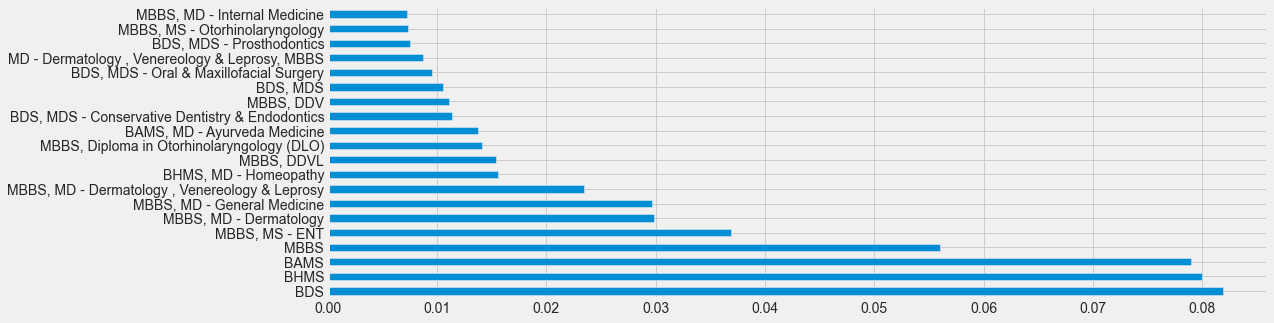

In [12]:
plt.figure(figsize=(15,5))
train_df['Qualification'].value_counts(normalize=True)[:20].plot(kind='barh')

In [13]:
train_df['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [14]:
train_df['Experience_group'] = pd.cut(x=train_df['Experience'], bins=[0,10,20,30,40,50,60,70])


In [15]:
train_df.head(100)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Experience_group
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,"(20, 30]"
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,"(10, 20]"
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,"(0, 10]"
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,"(10, 20]"
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...
95,BHMS,12,100%,"Kanakpura Road, Bangalore",Homeopath,Pediaterics Skin Disorder Kidney Stone Treatment,500,Bangalore,Kanakpura Road,"(10, 20]"
96,"MD - Dermatology , Venereology & Leprosy, MBBS",13,97%,"Green Park, Delhi",Dermatologists,General dermatology Botox Injections Skin Boos...,700,Delhi,Green Park,"(10, 20]"
97,"MBBS, DDVL",24,NaN,"Maduravoyal, Chennai",Dermatologists,NaN,200,Chennai,Maduravoyal,"(20, 30]"
98,BAMS,27,NaN,"Dahisar East, Mumbai",Ayurveda,NaN,100,Mumbai,Dahisar East,"(20, 30]"


In [16]:
train_df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', nan, 'Sector 5'],
      dtype=object)

In [17]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Experience_group
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,"(20, 30]"
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,"(10, 20]"
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,"(0, 10]"
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,"(10, 20]"
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,"(10, 20]"


In [18]:
train_df.dtypes

Qualification           object
Experience               int32
Rating                  object
Place                   object
Profile                 object
Miscellaneous_Info      object
Fees                     int64
City                    object
Locality                object
Experience_group      category
dtype: object

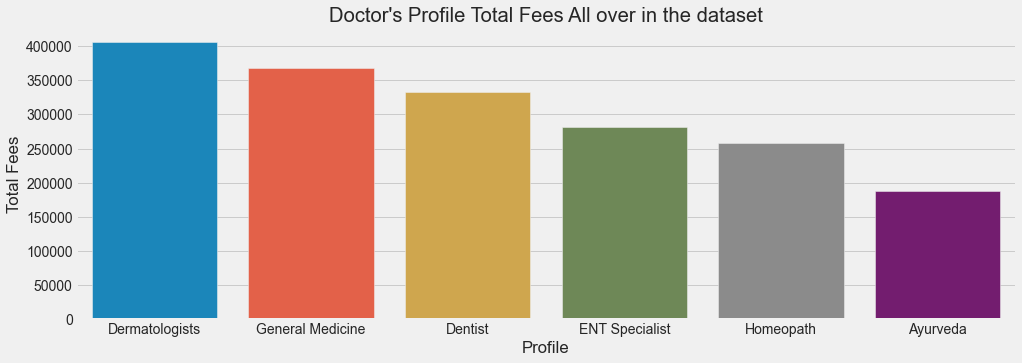

In [19]:
Profile1 = train_df.groupby(['Profile'])['Fees'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,5))
plt.title("Doctor's Profile Total Fees All over in the dataset")
sns.barplot(x = 'Profile' , y = 'Fees' , data = Profile1)
plt.ylabel('Total Fees')
plt.show()

Dermatologist, General Medicine are lots of patient because thier total fees according to thier profile sum all in the dataset  is high

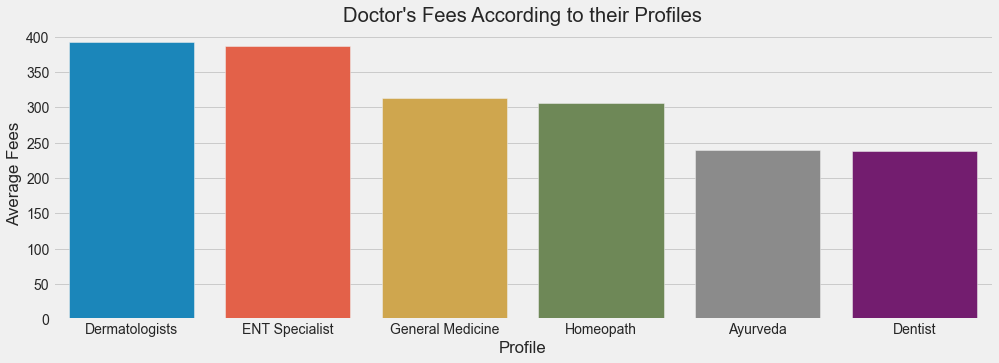

In [20]:
Profile2 = train_df.groupby(['Profile'])['Fees'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,5))
plt.title("Doctor's Fees According to their Profiles")
sns.barplot(x = 'Profile' , y = 'Fees' , data = Profile2)
plt.ylabel('Average Fees')
plt.show()

Dermatologist and ENT Specialist Fees high as compared to others

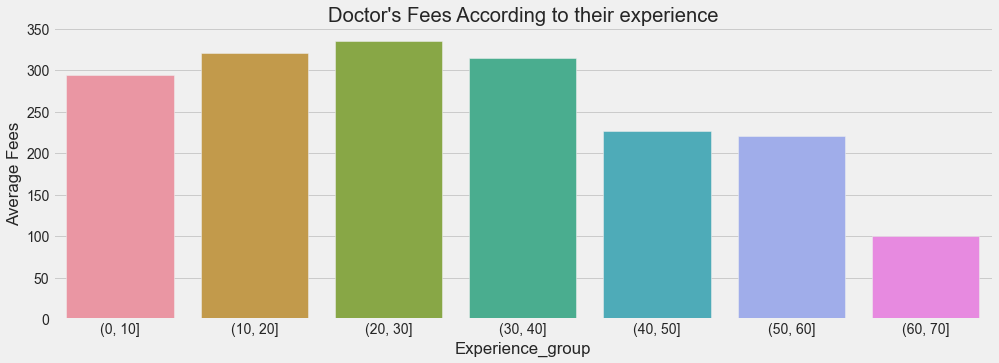

In [21]:
experience = train_df.groupby(['Experience_group'])['Fees'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,5))
plt.title("Doctor's Fees According to their experience")
sns.barplot(x = 'Experience_group' , y = 'Fees' , data = experience)
plt.ylabel('Average Fees')
plt.show()

The Doctor's, whose experience is between 20 to 30 and 30 to 40 their Fees is high

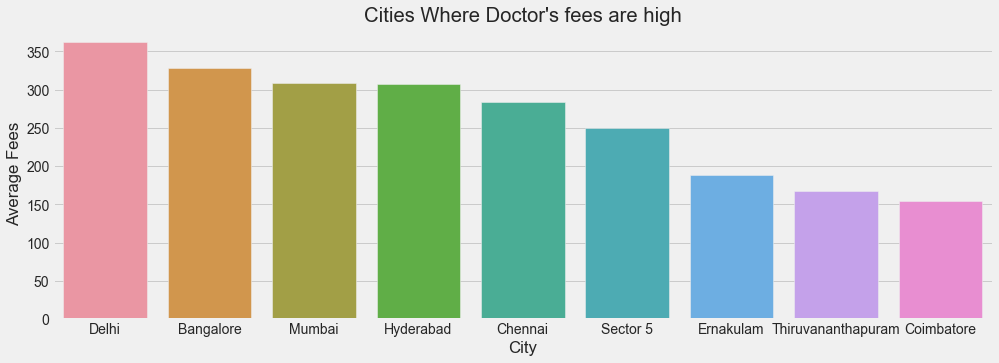

In [22]:
City = train_df.groupby(['City'])['Fees'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,5))
plt.title("Cities Where Doctor's fees are high")
sns.barplot(x = 'City' , y = 'Fees' , data = City)
plt.ylabel('Average Fees')
plt.show()

Delhi,Banglore and Mumbai are metropolitan cities so  Doctor's fees is high in this Cities

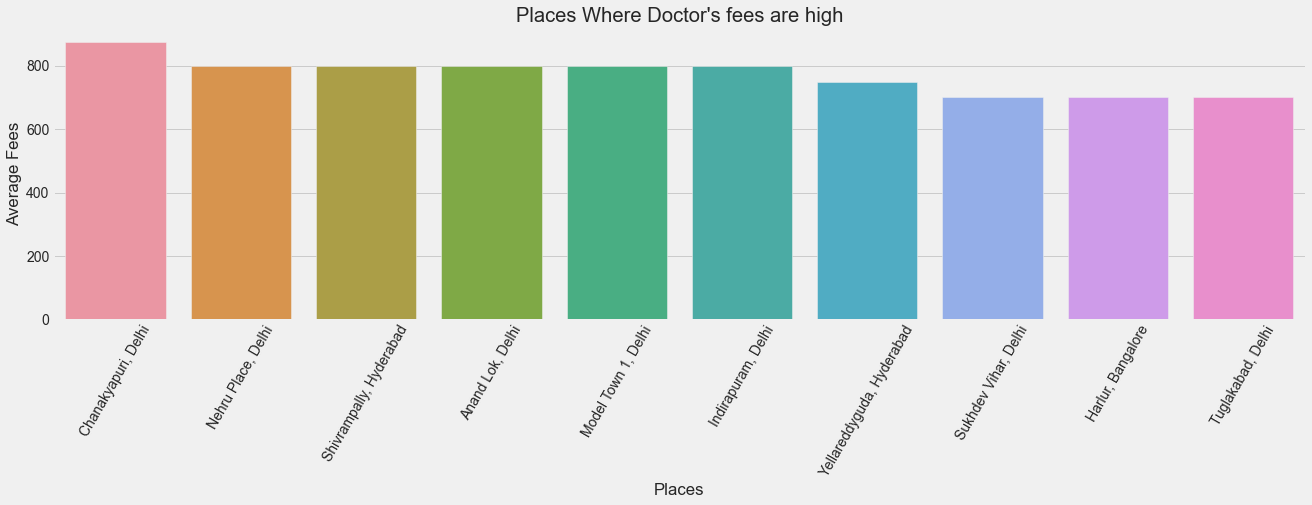

In [23]:
place = train_df.groupby(['Place'])['Fees'].mean().sort_values(ascending = False).head(10).reset_index()
 
plt.figure(figsize=(20,5))
plt.title("Places Where Doctor's fees are high")
sns.barplot(x = 'Place' , y = 'Fees' , data = place)
plt.xlabel('Places')
plt.ylabel('Average Fees')
plt.xticks(rotation = 60)
plt.show()

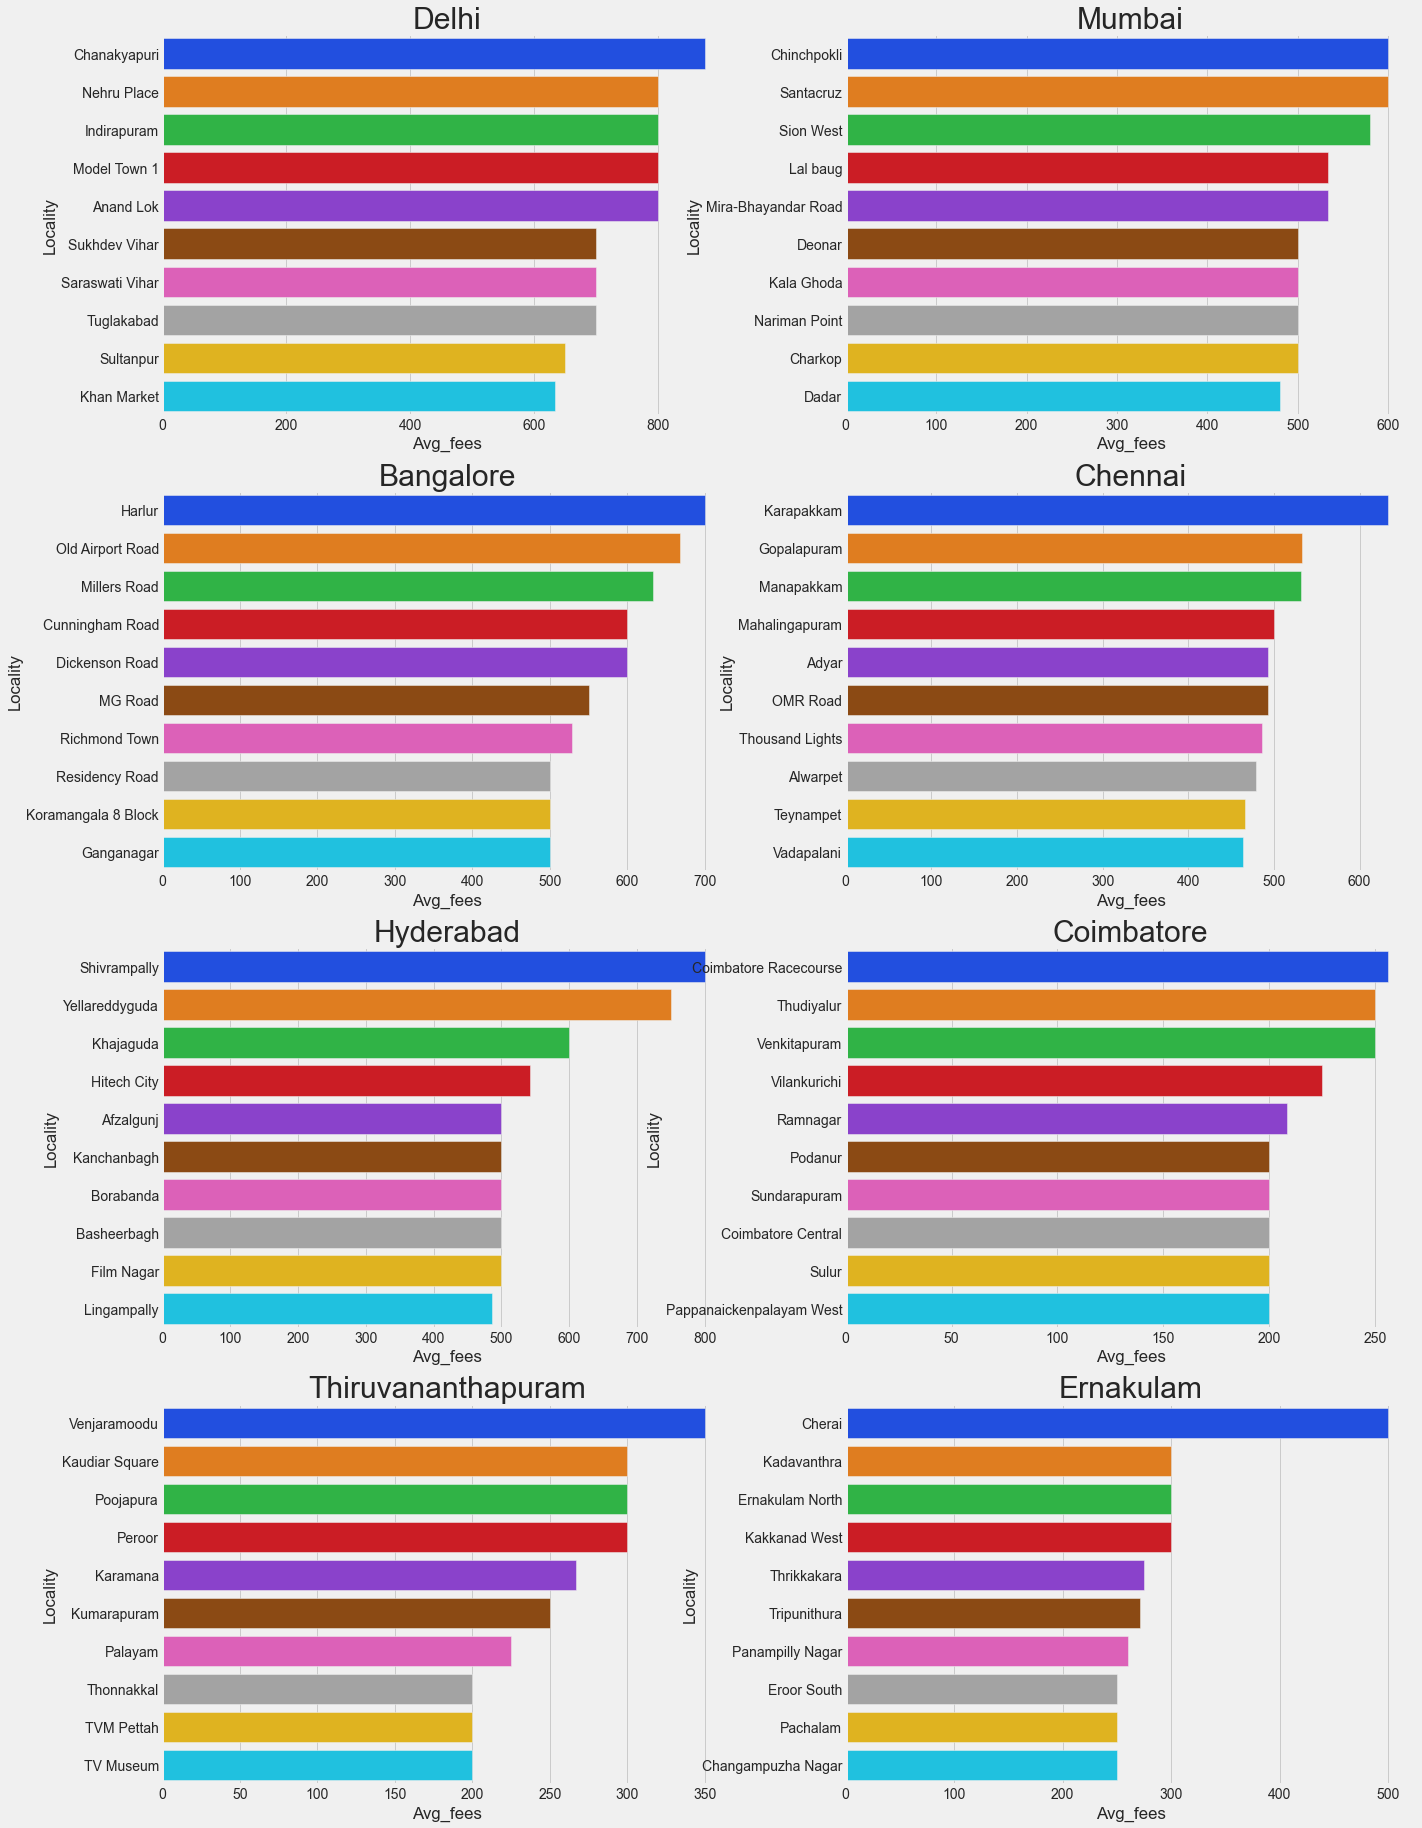

In [24]:
City_wise = train_df.groupby(['Locality','City'])['Fees'].mean().sort_values(ascending = False).reset_index()
cities = ['Delhi','Mumbai', 'Bangalore','Chennai', 'Hyderabad',
       'Coimbatore', 'Thiruvananthapuram','Ernakulam']

plt.figure(figsize=(20,30))
for i , state in enumerate(cities):
    City_wise1 = City_wise[City_wise['City'] == state]
    City_wise1 = City_wise1.head(10)
    plt.subplot(4,2,i+1)
    ax = sns.barplot(data= City_wise1,x= 'Fees' ,y= 'Locality',palette = 'bright' )
    plt.xlabel('Avg_fees')
    plt.title(state.capitalize(),size = 30)
       
plt.show()

I Create a horizontal bar graph of all cities according to their areas Where doctor's fees is high

 ***We will split columns of our data so that we can extract important information***

In [25]:
# Train set
train_df['Qual_1'] = train_df['Qualification'].str.split(',').str[0]
train_df['Qual_2'] = train_df['Qualification'].str.split(',').str[1]
train_df['Qual_3'] = train_df['Qualification'].str.split(',').str[2]

# Test set
test_df['Qual_1'] = test_df['Qualification'].str.split(',').str[0]
test_df['Qual_2'] = test_df['Qualification'].str.split(',').str[1]
test_df['Qual_3'] = test_df['Qualification'].str.split(',').str[2]



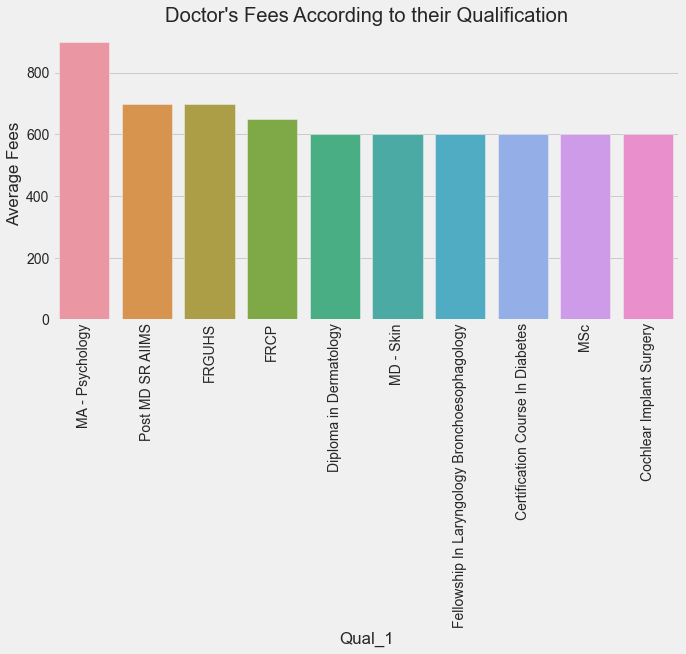

In [26]:
Qual= train_df.groupby(['Qual_1'])['Fees'].mean().sort_values(ascending = False).head(10).reset_index()
plt.figure(figsize=(10,5))
plt.title("Doctor's Fees According to their Qualification")
sns.barplot(x = 'Qual_1' , y = 'Fees' , data = Qual)
plt.ylabel('Average Fees')
plt.xticks(rotation = 90)
plt.show()

In [27]:
list(train_df.Miscellaneous_Info[0:20])

['100% 16 Feedback Kakkanad, Ernakulam',
 '98% 76 Feedback Whitefield, Bangalore',
 nan,
 'Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb',
 '100% 4 Feedback Keelkattalai, Chennai',
 nan,
 nan,
 'Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction',
 nan,
 nan,
 nan,
 nan,
 '98% 14 Feedback Coimbatore Racecourse, Coimbatore',
 'Dental Crowns Facet Dental Dental prophylaxis',
 nan,
 nan,
 nan,
 nan,
 '79% 8 Feedback KPHB, Hyderabad',
 '100% 4 Feedback HSR Layout, Bangalore']

*** Here We take feedback number from Miscellaneous_Info features it is important for our Analysis***

In [28]:
# Define function to return the Feedback numbers

def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [29]:
# Fetch out the feedback numbers in different records. 

# Train set
train_df['feedack_num'] = train_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

# Test set
test_df['feedack_num'] = test_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

In [30]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Experience_group,Qual_1,Qual_2,Qual_3,feedack_num
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,"(20, 30]",BHMS,MD - Homeopathy,NaN,16
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,"(10, 20]",BAMS,MD - Ayurveda Medicine,NaN,76
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,"(0, 10]",MBBS,MS - Otorhinolaryngology,NaN,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,"(10, 20]",BSc - Zoology,BAMS,NaN,0
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,"(10, 20]",BAMS,NaN,NaN,4


In [31]:
# Extract features Which we use for model buildings

# train
train = train_df[['Experience', 'Rating', 'Profile',
        'Fees', 'City', 'Locality',
       'Qual_1', 'Qual_2', 'Qual_3', 'feedack_num']]
# test
test = test_df[['Experience', 'Rating', 'Profile',
         'City', 'Locality',
       'Qual_1', 'Qual_2', 'Qual_3', 'feedack_num']]


In [32]:
train.head()

,Experience,Rating,Profile,Fees,City,Locality,Qual_1,Qual_2,Qual_3,feedack_num
0,24,100%,Homeopath,100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,16
1,12,98%,Ayurveda,350,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,76
2,9,NaN,ENT Specialist,300,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0
3,12,NaN,Ayurveda,250,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0
4,20,100%,Ayurveda,250,Chennai,Keelkattalai,BAMS,NaN,NaN,4


In [33]:
train.isnull().sum()

Experience        0
Rating         3302
Profile           0
Fees              0
City             26
Locality         25
Qual_1            0
Qual_2         1962
Qual_3         4590
feedack_num       0
dtype: int64

In [34]:
test.isnull().sum()

Experience        0
Rating         1090
Profile           0
City              6
Locality          6
Qual_1            0
Qual_2          609
Qual_3         1498
feedack_num       0
dtype: int64

In [35]:
# missing value imputation for train dataset

train['Rating'].fillna('0%',inplace = True)
train['City'].fillna("XXX",inplace = True)
train['Locality'].fillna("XXX",inplace = True)
train['Profile'].fillna("XXX",inplace = True)
train['Qual_1'].fillna("XXX",inplace = True)
train['Qual_2'].fillna("XXX",inplace = True)
train['Qual_3'].fillna("XXX",inplace = True)
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [36]:
# missing value imputation for test dataset

test['Rating'].fillna('0%',inplace = True)
test['City'].fillna("XXX",inplace = True)
test['Locality'].fillna("XXX",inplace = True)
test['Profile'].fillna("XXX",inplace = True)
test['Qual_1'].fillna("XXX",inplace = True)
test['Qual_2'].fillna("XXX",inplace = True)
test['Qual_3'].fillna("XXX",inplace = True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)


In [37]:
train.isnull().sum()

Experience     0
Rating         0
Profile        0
Fees           0
City           0
Locality       0
Qual_1         0
Qual_2         0
Qual_3         0
feedack_num    0
dtype: int64

In [38]:
test.isnull().sum()

Experience     0
Rating         0
Profile        0
City           0
Locality       0
Qual_1         0
Qual_2         0
Qual_3         0
feedack_num    0
dtype: int64

# Skewness

In [39]:
train.skew()

Experience      0.991089
Rating          0.247186
Fees            0.751870
feedack_num    15.549863
dtype: float64

In [40]:
train['Experience'] = np.log1p(train['Experience'])
train['Rating'] = np.log1p(train['Rating'])
train['Fees'] = np.log1p(train['Fees'])
train['feedack_num'] = np.log1p(train['feedack_num'])

# Outliers

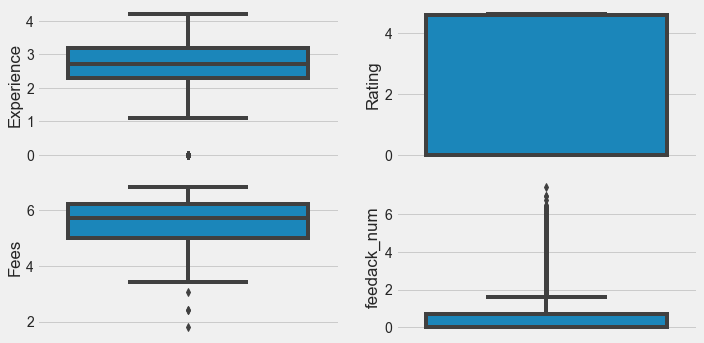

In [41]:
boxp = train[['Experience', 'Rating', 'Fees', 'feedack_num' ]]
fig = plt.figure(figsize=(10,5))
for i in range(len(boxp.columns)):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(y=boxp.iloc[:,i])

plt.tight_layout()
plt.show()

In [42]:
from scipy.stats import zscore
z_score=abs(zscore(boxp))
print("The shape of dataset before removing outliers",train.shape)
train=train.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",train.shape)

The shape of dataset before removing outliers (5961, 10)
The shape of dataset after removing outliers (5766, 10)


In [43]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
train["Qual_1_code"] = lb_encode.fit_transform(train["Qual_1"])
train["Qual_2_code"] = lb_encode.fit_transform(train["Qual_2"])
train["Qual_3_code"] = lb_encode.fit_transform(train["Qual_3"])
train["Profile_code"] = lb_encode.fit_transform(train["Profile"])
train["City_code"] = lb_encode.fit_transform(train["City"])
train["Locality_code"] = lb_encode.fit_transform(train["Locality"])

In [44]:
train.head()

,Experience,Rating,Profile,Fees,City,Locality,Qual_1,Qual_2,Qual_3,feedack_num,Qual_1_code,Qual_2_code,Qual_3_code,Profile_code,City_code,Locality_code
0,3.218876,4.615121,Homeopath,4.615121,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,XXX,2.833213,8,251,398,5,4,294
1,2.564949,4.595120,Ayurveda,5.860786,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,XXX,4.343805,5,240,398,0,0,850
2,2.302585,0.000000,ENT Specialist,5.707110,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,XXX,0.000000,77,333,398,3,0,449
3,2.564949,0.000000,Ayurveda,5.525453,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,XXX,0.000000,12,7,398,0,0,68
4,3.044522,4.615121,Ayurveda,5.525453,Chennai,Keelkattalai,BAMS,XXX,XXX,1.609438,5,421,398,0,1,333


In [45]:
train.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'City', 'Locality', 'Qual_1',
       'Qual_2', 'Qual_3', 'feedack_num', 'Qual_1_code', 'Qual_2_code',
       'Qual_3_code', 'Profile_code', 'City_code', 'Locality_code'],
      dtype='object')

In [46]:
train_new = train[['Experience', 'Rating','Fees','feedack_num', 'Qual_1_code', 'Qual_2_code',
       'Qual_3_code', 'Profile_code', 'City_code', 'Locality_code']]

(10.5, -0.5)

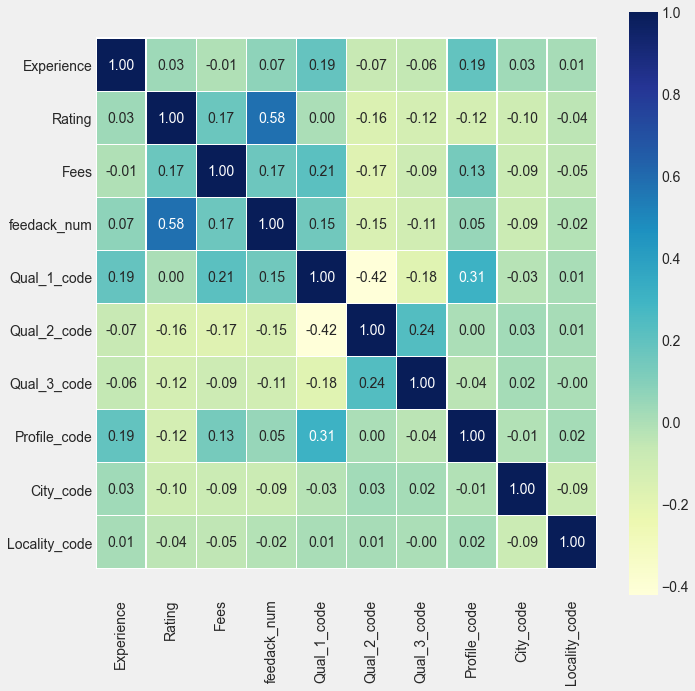

In [47]:
# Let's make our correlation matrix a little prettier
corr_matrix = train_new.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

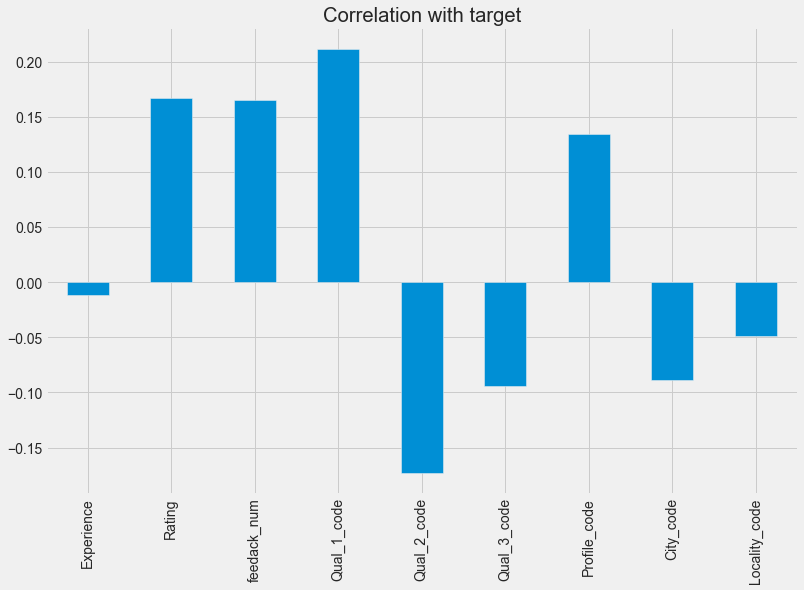

In [48]:
train_new.drop('Fees', axis=1).corrwith(train_new.Fees).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1) Here we see that Ratings , feedback_num and Qual_1 are positively correlated with the taret variables(Fees)

2) Qual_2 and Qual_3 are neatively correlated with the target variables (Fees)

3) experience and Locality not very good correlation with the target

In [49]:
train_new.head()

,Experience,Rating,Fees,feedack_num,Qual_1_code,Qual_2_code,Qual_3_code,Profile_code,City_code,Locality_code
0,3.218876,4.615121,4.615121,2.833213,8,251,398,5,4,294
1,2.564949,4.595120,5.860786,4.343805,5,240,398,0,0,850
2,2.302585,0.000000,5.707110,0.000000,77,333,398,3,0,449
3,2.564949,0.000000,5.525453,0.000000,12,7,398,0,0,68
4,3.044522,4.615121,5.525453,1.609438,5,421,398,0,1,333


In [50]:
train_new.isnull().sum()

Experience       0
Rating           0
Fees             0
feedack_num      0
Qual_1_code      0
Qual_2_code      0
Qual_3_code      0
Profile_code     0
City_code        0
Locality_code    0
dtype: int64

In [51]:
train_new.head()

,Experience,Rating,Fees,feedack_num,Qual_1_code,Qual_2_code,Qual_3_code,Profile_code,City_code,Locality_code
0,3.218876,4.615121,4.615121,2.833213,8,251,398,5,4,294
1,2.564949,4.595120,5.860786,4.343805,5,240,398,0,0,850
2,2.302585,0.000000,5.707110,0.000000,77,333,398,3,0,449
3,2.564949,0.000000,5.525453,0.000000,12,7,398,0,0,68
4,3.044522,4.615121,5.525453,1.609438,5,421,398,0,1,333


In [52]:
X = train_new.drop(['Fees'], axis=1)
y = train_new.Fees

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_log_error


In [56]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','RMSE','RMLSE'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(np.sqrt(mean_squared_error(y_test,pred)),3),
                          np.round(np.sqrt(mean_squared_log_error(y_test,pred)),3),
                         ]

In [57]:
results

,MAE,RMSE,RMLSE
Linear Regression,0.540,0.647,0.101
Decision Tree,0.630,0.848,0.133
Random Forest,0.490,0.610,0.095
Support Vector Machines,0.527,0.662,0.104
K-nearest Neighbors,0.606,0.830,0.130
XGBoost,0.480,0.611,0.096


Random Forest perform better than others

In [58]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.0min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [60]:
RF = RandomForestRegressor(bootstrap = True,
                         max_depth = 90,
                         max_features = 2,
                         min_samples_leaf = 3,
                         min_samples_split = 12,
                        n_estimators = 200)

In [61]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, max_features=2, min_samples_leaf=3,
                      min_samples_split=12, n_estimators=200)

In [62]:
import joblib
joblib.dump(RF, 'DoctorFees_pkl')

['DoctorFees_pkl']